In [3]:
with open('/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/phased_fams/phased_fams_all.pickle', 'rb') as f:
    phased_fam_dict = pickle.load(f)

In [8]:
len(phased_fam_dict)

727

In [183]:
stds = [.05, .1, .15, .2, .25, .5, 1]
x = 0
full_df = np.zeros((n_rows,3*len(stds) + 4))
for start in np.arange(nth_start,nth_start + n_rows, max_chunk)[4:]:
    x = x + 1
    print('Loading likelihoods...')
    L = np.loadtxt(LIKELIHOOD_FILE_DIR + 'likelihood_matrix_phasings_kmers.tsv' ,
                  delimiter='\t',max_rows=max_chunk, skiprows=start)
    print("Matrix multiplication...")
    
    kmer_counts = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/data/known_kmer_counts.tsv',
                            header=None, index_col=0, nrows=max_chunk,skiprows=start)

    kmer_names = pd.read_table(
        '/home/groups/dpwall/briannac/alt_haplotypes/data/known_kmers.txt',
    sep='\t', header=None, nrows=max_chunk, skiprows=start)
    
    localized_regions = dict()
    likelihoods = np.matmul(L, regions_t)
    
    start_idx =  start-nth_start

    m = [MADRegion(L, 25) for L in likelihoods]
    A = pd.DataFrame(m)
    A['kmer'] = kmer_chrom
    A['loci'] = kmer_loci
    A[np.isnan(A)] = -1
    print(np.mean(A[0]==-1))
    print(np.mean((A[0]==A.kmer) & (abs(A.loci-A[1])<100000)) + np.mean(A[0]==-1))
    print(np.nanmedian(abs(A[A[1]!=-1][1]-A[A[1]!=-1][2])))

Loading likelihoods...
Matrix multiplication...
0.506
0.532
8839650.0
Loading likelihoods...
Matrix multiplication...
0.283
0.298
8431557.0
Loading likelihoods...
Matrix multiplication...
0.341
0.372
8148720.0
Loading likelihoods...
Matrix multiplication...
0.462
0.49000000000000005
8070650.0
Loading likelihoods...
Matrix multiplication...
0.8
0.8
9812460.0
Loading likelihoods...
Matrix multiplication...
0.806
0.806
7881183.5
Loading likelihoods...
Matrix multiplication...
0.9
0.9
7314290.0
Loading likelihoods...
Matrix multiplication...
0.8
0.8
9121411.0
Loading likelihoods...
Matrix multiplication...


KeyboardInterrupt: 

In [268]:
def LRegion(L, p_thresh=.001):
    '''
        Returns the the smallest and largest position where the likelihood is <=1 standard deivation away from the maximum likelihood.
                Parameters:
                        L (array): Array of likelihoods for each global genomic region.
                        std_thresh (float): Number of standard deviations away from the maximum likelihood to consider.

                Returns:
                        interval (tuple): The start and end idxs.
        '''
    
    #L_log = L/np.log2(np.exp(1))
#    idxs = np.where((L_log-np.max(L_log))>=-10)[0]
    idxs = np.where(L>=(np.median(L)+4*np.std(L)))[0]
    if len(idxs)==0: return (np.nan, np.nan, np.nan)
    start = idxs[0]
    end = idxs[-1]
    start = idx_to_global_region[start]
    end = idx_to_global_region[end]
    start_chr = int(start.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    end_chr = int(end.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    start_loci = int(start.split('.')[1])
    end_loci = int(end.split('.')[-1])
    if start_chr!=end_chr: return (np.nan, np.nan, np.nan)
    return (start_chr, start_loci, end_loci)

In [265]:
def MADRegion(L, p_thresh=.001):
    '''
        Returns the the smallest and largest position where the likelihood is <=1 standard deivation away from the maximum likelihood.
                Parameters:
                        L (array): Array of likelihoods for each global genomic region.
                        std_thresh (float): Number of standard deviations away from the maximum likelihood to consider.

                Returns:
                        interval (tuple): The start and end idxs.
        '''
    median = np.median(L)
    mad = np.std(L)
    idxs = np.where(L>(median+2*mad))[0]
    if len(idxs)==0: return (np.nan, np.nan, np.nan)
    start = idxs[0]
    end = idxs[-1]
    start = idx_to_global_region[start]
    end = idx_to_global_region[end]
    start_chr = int(start.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    end_chr = int(end.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    start_loci = int(start.split('.')[1])
    end_loci = int(end.split('.')[-1])
    if start_chr!=end_chr: return (np.nan, np.nan, np.nan)
    return (start_chr, start_loci, end_loci)

In [269]:
m = [LRegion(L, 2) for L in likelihoods]
A = pd.DataFrame(m)
kmer_chrom = [int(c.split('_')[0].replace('chr', '').replace('X', '23').replace('Y', '24')) for c in kmer_names[1]]
kmer_loci = [int(c.split(':')[1].split('-')[0]) + l for c,l in zip(kmer_names[2], kmer_names[3])]
A['kmer'] = kmer_chrom
A['loci'] = kmer_loci
A[np.isnan(A)] = -1
print(np.mean(A[0]==-1))
print(np.mean((A[0]==A.kmer) & (abs(A.loci-A[1])<10000000)) + np.mean(A[0]==-1))
print(np.nanmedian(abs(A[A[1]!=-1][1]-A[A[1]!=-1][2])))

0.662
0.728
43764637.0


In [270]:
A

,0,1,2,kmer,loci
0,-1.0,-1.0,-1.0,15,66106530
1,-1.0,-1.0,-1.0,15,66106531
2,-1.0,-1.0,-1.0,15,66106532
3,-1.0,-1.0,-1.0,15,66106533
4,-1.0,-1.0,-1.0,15,66106534
...,...,...,...,...,...
995,15.0,50216624.0,87161275.0,15,66107525
996,15.0,56033754.0,89532940.0,15,66107526
997,15.0,59535102.0,89532940.0,15,66107527
998,15.0,59161336.0,88466979.0,15,66107528


In [231]:
A.iloc[100]

0             15.0
1       66066646.0
2       66130179.0
kmer          15.0
loci    44858837.0
Name: 100, dtype: float64

In [232]:
A

,0,1,2,kmer,loci
0,3.0,133864804.0,140823538.0,15,44858737
1,-1.0,-1.0,-1.0,15,44858738
2,3.0,133819172.0,140821876.0,15,44858739
3,3.0,133820731.0,140399202.0,15,44858740
4,3.0,139310755.0,140399202.0,15,44858741
...,...,...,...,...,...
995,15.0,66066161.0,66567888.0,15,44860305
996,15.0,66066161.0,66939451.0,15,44860306
997,15.0,66066161.0,66939451.0,15,44860307
998,15.0,65589988.0,66939451.0,15,44860308


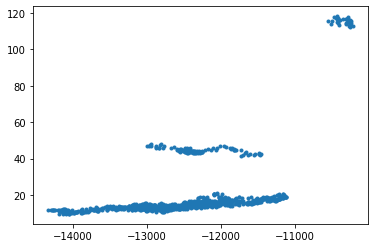

In [158]:
stds = [np.std(l) for l in likelihoods]
meds = [np.median(l) for l in likelihoods]

maxs = [np.max(l) for l in likelihoods]
#plt.plot(maxs)
#plt.plot(stds)
plt.plot(meds, stds, '.')

In [92]:
from scipy.stats import chi2

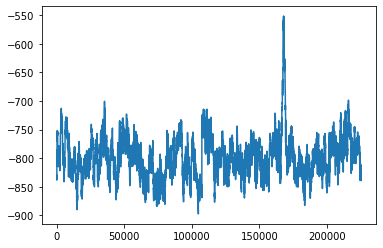

In [105]:
np.log(2)

In [246]:
chi2.ppf(.95, 96005)

96726.89275375933

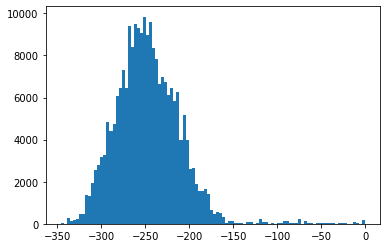

In [100]:
plt.hist(likelihoods[0]-max(likelihoods[0]), bins=100)
plt.show()

In [48]:
np.log2(.14)

-2.8365012677171206

In [5]:
if True:
    start_idx =  start-nth_start

    for i, std in enumerate(stds):
        idx = 4 + 3*i
        full_df[start_idx:(start_idx+len(L)),idx:(idx+3)] = [GlobalInterval(l,std)  for l in likelihoods] #[np.array(l) for l in localized_regions]


    # Ground truth values.
    kmer_chrom = [int(c.split('_')[0].replace('chr', '').replace('X', '23').replace('Y', '24')) for c in kmer_names[1]]
    kmer_loci = [int(c.split(':')[1].split('-')[0]) + l for c,l in zip(kmer_names[2], kmer_names[3])]
    full_df[start_idx:(start_idx+len(L)),0] = [int(c.split('_')[0].replace('chr', '').replace('X', '23').replace('Y', '24')) for c in kmer_names[1]]
    full_df[start_idx:(start_idx+len(L)),1] = [int(c.split(':')[1].split('-')[0]) + l for c,l in zip(kmer_names[2], kmer_names[3])]

    # Some metrics about the ground truth kmers.
    full_df[start_idx:(start_idx+len(L)),2] = kmer_counts.apply(axis=1, func=lambda x: round(x[x!=0].median(), 1))
    full_df[start_idx:(start_idx+len(L)),3] = np.round((kmer_counts>0).mean(axis=1), 3)

    
    

In [ ]:
def GlobalInterval(L, std_thresh=1):
    '''
        Returns the the smallest and largest position where the likelihood is <=1 standard deivation away from the maximum likelihood.
                Parameters:
                        L (array): Array of likelihoods for each global genomic region.
                        std_thresh (float): Number of standard deviations away from the maximum likelihood to consider.

                Returns:
                        interval (tuple): The start and end idxs.
        '''    
    thresh = np.max(L) - std_thresh*np.std(L)
    if len(np.where(L>=thresh)[0])==0: return (np.nan, np.nan, np.nan)
    start = np.where(L>=thresh)[0][0]
    end = np.where(L>=thresh)[0][-1]
    start = idx_to_global_region[start]
    end = idx_to_global_region[end]
    start_chr = int(start.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    end_chr = int(end.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    start_loci = int(start.split('.')[1])
    end_loci = int(end.split('.')[-1])
    if start_chr!=end_chr: return (np.nan, np.nan, np.nan)
    return (start_chr, start_loci, end_loci)


def LRegion(L, p_thresh=.001):
    '''
        Returns the the smallest and largest position where the likelihood is <=1 standard deivation away from the maximum likelihood.
                Parameters:
                        L (array): Array of likelihoods for each global genomic region.
                        std_thresh (float): Number of standard deviations away from the maximum likelihood to consider.

                Returns:
                        interval (tuple): The start and end idxs.
        '''
    L_log = L/np.log2(np.exp(1))
    if len(np.where((L_log-np.max(L_log))<=1.92)[0])==0: return (np.nan, np.nan, np.nan)
    start = np.where((L_log-np.max(L_log))<=1.92)[0][0]
    end = np.where((L_log-np.max(L_log))<=1.92)[0][-1]
    start = idx_to_global_region[start]
    end = idx_to_global_region[end]
    start_chr = int(start.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    end_chr = int(end.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    start_loci = int(start.split('.')[1])
    end_loci = int(end.split('.')[-1])
    if start_chr!=end_chr: return (np.nan, np.nan, np.nan)
    return (start_chr, start_loci, end_loci)


In [111]:
np.exp(1)

2.718281828459045

In [71]:
l = likelihoods[1]
sum((max(l)-l)<=-np.log2(.146))

167

In [38]:
from scipy import stats
#MAD = stats.median_absolute_deviation

In [88]:
#g = [GlobalInterval(L, .1) for L in likelihoods]
m = [LRegion(L, .146) for L in likelihoods]
A = pd.DataFrame(m)
A['kmer'] = kmer_chrom
A['loci'] = kmer_loci
print(np.mean(np.isnan(A[0])))
print(np.mean((A[0]==A.kmer))+np.mean(np.isnan(A[0])))# & (abs(A.loci-A[])<1000000))
print(np.nanmedian(abs(A[1]-A[2])))

0.04
0.9490000000000001
323299.0


In [15]:
A = pd.DataFrame(m)
A['kmer'] = kmer_chrom
A['loci'] = kmer_loci
print(np.mean(np.isnan(A[0])))
print(np.mean((A[0]==A.kmer)))# & (abs(A.loci-A[])<1000000))
np.nanmedian(abs(A[1]-A[2]))

0.04
0.909


323299.0

In [245]:
len(set(likelihoods[0]))

96005

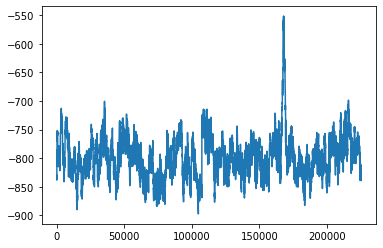

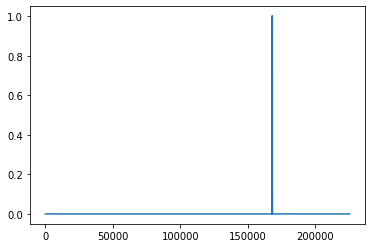

In [52]:
l = likelihoods[0]
MAD = stats.median_abs_deviation(l)
median = np.median(l)
plt.plot(l)
plt.figure()
plt.plot((l-median)/MAD >=10)

In [11]:
def GlobalInterval(L, std_thresh=1):
    '''
        Returns the the smallest and largest position where the likelihood is <=1 standard deivation away from the maximum likelihood.
                Parameters:
                        L (array): Array of likelihoods for each global genomic region.
                        std_thresh (float): Number of standard deviations away from the maximum likelihood to consider.

                Returns:
                        interval (tuple): The start and end idxs.
        '''    
    thresh = np.max(L) - std_thresh*np.std(L)
    if len(np.where(L>=thresh)[0])==0: return (np.nan, np.nan, np.nan)
    start = np.where(L>=thresh)[0][0]
    end = np.where(L>=thresh)[0][-1]
    start = idx_to_global_region[start]
    end = idx_to_global_region[end]
    start_chr = int(start.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    end_chr = int(end.split('.')[0].replace('chr', '').replace('X', '23').replace('Y', '24'))
    start_loci = int(start.split('.')[1])
    end_loci = int(end.split('.')[-1])
    if start_chr!=end_chr: return (np.nan, np.nan, np.nan)
    return (start_chr, start_loci, end_loci)

stds = [.05, .1, .15, .2, .25, .5, 1]
full_df = np.zeros((n_rows,3*len(stds) + 4))
for start in np.arange(nth_start,nth_start + n_rows, max_chunk):
    
    print('Loading likelihoods...')
    L = np.loadtxt(LIKELIHOOD_FILE_DIR + 'likelihood_matrix_phasings_kmers.tsv' ,
                  delimiter='\t',max_rows=max_chunk, skiprows=start)
    print("Matrix multiplication...")
    
    
    kmer_counts = pd.read_table('/home/groups/dpwall/briannac/alt_haplotypes/data/known_kmer_counts.tsv',
                            header=None, index_col=0, nrows=max_chunk,skiprows=start)

    kmer_names = pd.read_table(
        '/home/groups/dpwall/briannac/alt_haplotypes/data/known_kmers.txt',
    sep='\t', header=None, nrows=max_chunk, skiprows=start)
    
    
    localized_regions = dict()
    likelihoods = np.matmul(L, regions_t)
    start_idx =  start-nth_start

    for i, std in enumerate(stds):
        idx = 4 + 3*i
        full_df[start_idx:(start_idx+len(L)),idx:(idx+3)] = [GlobalInterval(l,std)  for l in likelihoods] #[np.array(l) for l in localized_regions]


    # Ground truth values.
    kmer_chrom = [int(c.split('_')[0].replace('chr', '').replace('X', '23').replace('Y', '24')) for c in kmer_names[1]]
    kmer_loci = [int(c.split(':')[1].split('-')[0]) + l for c,l in zip(kmer_names[2], kmer_names[3])]
    full_df[start_idx:(start_idx+len(L)),0] = [int(c.split('_')[0].replace('chr', '').replace('X', '23').replace('Y', '24')) for c in kmer_names[1]]
    full_df[start_idx:(start_idx+len(L)),1] = [int(c.split(':')[1].split('-')[0]) + l for c,l in zip(kmer_names[2], kmer_names[3])]

    # Some metrics about the ground truth kmers.
    full_df[start_idx:(start_idx+len(L)),2] = kmer_counts.apply(axis=1, func=lambda x: round(x[x!=0].median(), 1))
    full_df[start_idx:(start_idx+len(L)),3] = np.round((kmer_counts>0).mean(axis=1), 3)


    
    if len(L) < max_chunk: break
    
header = ['chrom_true', 'loci_true', 'median_of_nonzeros', 'prevalence']
for std in stds:
    header = header + ['chrom_pred_%s' % str(std), 'start_pred_%s' % str(std), 'end_pred_%s' % str(std)]
    
np.savetxt(LOCALIZED_FILE_DIR + 'localized_%03d.txt' % N , np.array(full_df),
           header='\t'.join(header), delimiter='\t')
print('saved to ', LOCALIZED_FILE_DIR + ('localized_%03d.txt' % N))

# Load Data

In [2]:
# Load in family region/global region conversion data.
fam_region_to_idx = np.load(PHASINGS_DIR +  'fam_region_to_idx.npy', allow_pickle=True).item()
idx_to_fam_region = np.load(PHASINGS_DIR +  'idx_to_fam_region.npy', allow_pickle=True).item()
global_region_to_idx = np.load(PHASINGS_DIR +  'global_region_to_idx.npy', allow_pickle=True).item()
idx_to_global_region = np.load(PHASINGS_DIR +  'idx_to_global_region.npy', allow_pickle=True).item()
fam_idx_to_global_idx = np.load(PHASINGS_DIR + 'fam_regions_to_global_regions.npy', allow_pickle=True)
family_info = pd.read_pickle(PHASINGS_DIR + 'fam_list.df')


# Info from BAM mappings.

bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']


## Simulated k-mer counts.

In [3]:
#kmer_counts = pd.read_table(KMER_COUNTS_FILE, index_col=0)
#kmer_counts = kmer_counts[((kmer_counts>0).mean(axis=1)>.05) & ((kmer_counts>0).mean(axis=1)<.5)]
#kmer_counts.index = [(int(i.split(',')[0].replace('(', '')), float(i.split(',')[1].replace(')', ''))) for i in kmer_counts.index]


## Alternative Haplotypes from Decoy Sequence

In [3]:
# Load in k-mer counts.
KMERS_FILE = '/home/groups/dpwall/briannac/alt_haplotypes/data/known_kmers.txt'
KMER_COUNTS_FILE = '/home/groups/dpwall/briannac/alt_haplotypes/data/known_kmer_counts.tsv'

ref_genome = {r.id:r.description.split('  ')[4].replace('rg:', '') for r in SeqIO.parse(
    '/home/groups/dpwall/briannac/general_data/reference_genomes/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa', 'fasta') if 'alt' in r.id}

kmer_counts = pd.read_table(KMER_COUNTS_FILE, header=None, index_col=0, nrows=1000,skiprows=10000)
kmer_names = pd.read_table(KMERS_FILE, header=None, index_col=0, nrows=1000,skiprows=10000)
kmer_counts.index = [(i,ref_genome[j]) for i,j in zip(kmer_names.index, kmer_names[1])]
kmer_counts.columns = bam_mappings.index
kmer_counts = kmer_counts[((kmer_counts>0).mean(axis=1)>.05) & ((kmer_counts>0).mean(axis=1)<.5)]
print(len(kmer_counts))

503


In [4]:
# Normalize k-mer counts by average sample depth.

kmer_length=100
PARENT_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
ihart_flagstat_file = PARENT_DIR + 'data/ihart_flagstat.csv'
flagstat = pd.read_csv(ihart_flagstat_file, index_col=0)
flagstat = flagstat.loc[set(flagstat.index).intersection(bam_mappings.index)]
bam_mappings = bam_mappings.loc[flagstat.index]
total_mapped_reads = flagstat.ProperPair*((flagstat.Total_Reads-flagstat.Supplementary-flagstat.Duplicates)/flagstat.Total_Reads)
avg_coverage = total_mapped_reads*150/(6.27e9*(bam_mappings.sex_numeric.astype(float)==1.0) + 6.37e9*(bam_mappings.sex_numeric.astype(float)==2.0))
avg_n_100mers = (150-kmer_length)/(150/avg_coverage)
kmer_depth_dict = {k:avg_n_100mers[k] for k in avg_n_100mers.keys()}
kmer_counts = kmer_counts[flagstat.index]

avg_k_depth = np.mean(list(kmer_depth_dict.values()))
norm_mult = np.array([avg_k_depth/kmer_depth_dict[c] for c in kmer_counts.columns])
kmer_counts_normed = kmer_counts.apply(lambda x: round(x*norm_mult), axis=1).astype(int)

In [14]:
from scipy.stats import poisson
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt
from glob import glob
import json
import pickle

def GlobalInterval(L, std_thresh=1):
    '''
        Returns the the smallest and largest position where the likelihood is <=1 standard deivation away from the maximum likelihood.
                Parameters:
                        L (array): Array of likelihoods for each global genomic region.
                        std_thresh (float): Number of standard deviations away from the maximum likelihood to consider.

                Returns:
                        interval (tuple): The start and end idxs.
        '''    
    thresh = np.max(L) - std_thresh*np.std(L)
    if len(np.where(L>thresh)[0])==0: return (0, 100000)
    start = np.where(L>thresh)[0][0]
    end = np.where(L>thresh)[0][-1]
    return (start, end)


class MLE:
    def __init__(self, avg_kmer_depth, poisson_cache_length, eps=0, phasing_error=.05):
        self.poisson_cache = [[], []]
        self.avg_kmer_depth=avg_kmer_depth
        self.poisson_cache[0] = [poisson.pmf(k=k, mu=avg_kmer_depth) for k in range(poisson_cache_length)]
        self.poisson_cache[1] = [poisson.pmf(k=k, mu=2*avg_kmer_depth) for k in range(poisson_cache_length)]
        self.cached_family_log_likelihood = dict()
        self.eps = eps
        self.phasing_error=phasing_error
        with open('/home/groups/dpwall/briannac/alt_haplotypes/data/phasings/phased_fams/phased_fams_all.pickle', 'rb') as f:
            self.phased_fam_dict = pickle.load(f)
        #with open('/home/groups/dpwall/briannac/alt_haplotypes/data/localize/family_probability_cache.pickle', 'rb') as f:
        #    self.family_probability_cache = pickle.load(f)

            
    def cached_poisson_pmf(self,k,g):
        if (g==0) & (k!=0):
            return self.eps
        if (k==0) & (g==0): 
            return 1-3*self.eps #poisson.pmf(g*avg_kmer_depth, k)
        else:
            return min(max(self.poisson_cache[g-1][k], self.eps), 1-3*self.eps)

        
        
    def family_log_likelihood(self,k_m, k_p, k_cs, phases_ch):

        '''
        Returns the probability of a k-mer distribution in a family given the each member's kmer counts and the children's phasings. Note: takes about 1 second per 50K family-regions.

                Parameters:
                        k_m (int): mom_kmer_count (int): A decimal integer
                        k_p (int): dad_kmer_count (int): Another decimal integer
                        phases_ch (list): A list of of tuples representing each child's phasings (mom's chromome, dad's chromosme) {(0,0), (0,1), (1,0), (1,1)}
                        avg_kmer_depth (int): Mean for avg k-mer depth of poisson distribution.

                Returns:
                        log likelihood (float): The log of the probability of the family's k-mer distribution given the famiy genotypes.
        '''    
        #key = (k_m, k_p, tuple(k_cs.values()), phases_ch)
        #if key in self.family_probability_cache: return self.family_probability_cache[key]
        #else: return eps
        #key = tuple(sorted([(k_m, k_p, k,g[0], g[1]) for k,g in zip(k_cs, phases_ch)]))
        #key = (k_m, k_p, tuple(k_cs.values), phases_ch) #tuple([(k_m, k_p, k,g[0], g[1]) for k,g in zip(k_cs, phases_ch)])
        #if key not in self.family_probability_cache: return np.log2(.00001)
        #else: return self.family_probability_cache[key]
        # TODO ADD TO KEY
        #if key in self.cached_family_log_likelihood: log_P = self.cached_family_log_likelihood[key]
        #else:
        if True:
            possible_gs = [(0,0), (1,1), (0,1), (1,0)]
            return np.log2(sum([self.cached_poisson_pmf(k_m,sum(g_m))*self.cached_poisson_pmf(k_p,sum(g_p))*
                                    np.prod([self.cached_poisson_pmf(k_c, g_m[phase_ch[0]]+g_p[phase_ch[1]]) 
                                             for k_c, phase_ch in zip(k_cs, phases_ch)]) for g_p in possible_gs for g_m in possible_gs]))
            log_P = log_P_ch#-log_P_m-log_P_p
            #self.cached_family_log_likelihood[key] = log_P

        #    if log_P>0: print("ERROR: log likelihood cannot be > 0")
        return log_P
    
    
    def GlobalLikelihood(self,kmer_count, bam_mappings, family_info, global_region_to_idx, fam_region_to_idx, fam_idx_to_global_idx, MAX_FAMS=None):
        global_likelihoods = [] #np.zeros(len(global_region_to_idx)) 
        fams_included = sorted(list(set(bam_mappings.loc[np.array(kmer_count[1].keys())[kmer_count[1].values>-1]].family).intersection(self.phased_fam_dict.keys())))
        if MAX_FAMS: fams_included = list(fams_included)[:min(MAX_FAMS, len(fams_included))]
        for fam in fams_included:
            t = time.time()
            
            # Initialize global likelihood
            global_likelihood = np.zeros(len(global_region_to_idx)) 


            # Extract mom, dad, and child sample_ids.
            children = family_info.loc[fam].sib_samples
            mom = family_info.loc[fam].mother_sample
            dad = family_info.loc[fam].father_sample
            
            #pdb.set_trace()
            fam_bad = False
            if mom not in set(bam_mappings.index): continue
            if dad not in set(bam_mappings.index): continue
            for ch in children:
                if ch not in set(bam_mappings.index):
                    fam_bad = True
                    break
            if fam_bad: continue
            
            phased_fam = self.phased_fam_dict[fam]
            print(fam)

            
            #print(time.time()-t, 'init')

            t = time.time()

            # Compute likelihood of family's k-mer distribution for each phasing configuration.
            fam_likelihood = np.zeros(len(phased_fam))
            phasings = [tuple(phased_fam[children].iloc[i].values) for i in range(len(phased_fam))]
            possible_phasings = set(phasings)
            # Convert family likelihood region to global region. 
            phasing_ps = np.array([self.family_log_likelihood(kmer_count[1][mom], kmer_count[1][dad], kmer_count[1][children].values, phase) 
                          for phase in possible_phasings])
            #phasing_ps = self.phasing_error*(sum(phasing_ps) - phasing_ps) + (1-self.phasing_error)*phasing_ps
            for phase, phase_p in zip(possible_phasings, phasing_ps):   
                idx = np.where([p==phase for p in phasings])[0]
                fam_likelihood[idx] = phase_p
            #print(tme.time()-t, 'compute lik')

            #for phase in possible_phasings:
            #    idx = np.where([p==phase for p in phasings])[0]
            #    fam_likelihood[idx] = self.family_log_likelihood(kmer_count[1][mom], kmer_count[1][dad], kmer_count[1][children], phase) #for i in range(len(phased_fam))
            #print(min(fam_likelihood), max(fam_likelihood))
            
            
            # Convert family likelihood region to global region. 
            t=time.time()
            for i,l in enumerate(fam_likelihood):
                global_idxs = fam_idx_to_global_idx[fam_region_to_idx[phased_fam.index[i]]]
                global_likelihood[global_idxs] =  l
            #print(time.time()-t, 'fam to global')
            t = time.time()
            # For regions with unknown phasings in the current family, default to the mode likelihood across the rest of the genome.
            global_likelihood[global_likelihood==0] = mode(
                global_likelihood[global_likelihood!=0]).mode[0]
            global_likelihoods = global_likelihoods + [global_likelihood]
        return np.array(global_likelihoods).sum(axis=0)


AU0001
AU0012
AU0021
AU0022
AU0027
AU0028
AU0030
AU0033
AU0037
AU0041
AU0043
AU0048
AU0053
AU0063
AU0084
AU0092
AU0093
AU0095
AU0109
AU0115
AU0120
AU0123
AU0127
AU0132
AU0133
AU0134
AU0137
AU0145
AU0148
AU0150
AU0157
AU0162
AU0164
AU0167
AU0169
AU0175
AU0176
AU0178
AU0179
AU0184
AU0188
AU0190
AU0193
AU0196
AU0199
AU0200
AU0201
AU0208
AU0210
AU0215
AU0222
AU0226
AU0231
AU0235
AU0236
AU0242
AU0247
AU0250
AU0254
AU0255
AU0258
AU0259
AU0262
AU0265
AU0267
AU0268
AU0273
AU0282
AU0285
AU0289
AU0293
AU0299
AU0305
AU0306
AU0311
AU0316
AU0325
AU0329
AU0331
AU0334
AU0336
AU0338
AU0340
AU0350
AU0356
AU0364
AU0370
AU0371
AU0379
AU0380
AU0388
AU0412
AU0423
AU0430
AU0432
AU0439
AU0459
AU0483
AU0487
AU0531
True Location: chr1:198370083-198725175 Predicted Region: 01.195703728 - 01.202059265


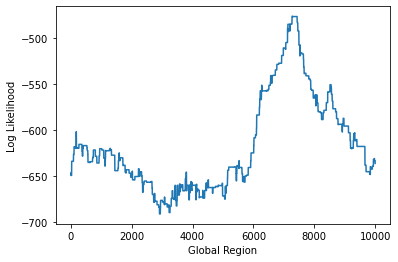

In [15]:
mle = MLE(5.83, 100, eps=0, phasing_error=0)
aa = []
for k in kmer_counts_normed[::100][5:].iterrows():
    a = mle.GlobalLikelihood(k, bam_mappings, family_info,
                         global_region_to_idx, fam_region_to_idx, fam_idx_to_global_idx,MAX_FAMS=100)
    aa = aa + [a]
    start, end = GlobalInterval(a)
    if idx_to_global_region[start][:2]!=idx_to_global_region[end][:2]:
        print('True Location:',  k[0][1], 'Could not localize k-mer.')
    else:
        print('True Location:',  k[0][1], 'Predicted Region:', 
          '.'.join(idx_to_global_region[start].split('.')[:2]), '-', '.'.join(np.array(idx_to_global_region[end].split('.'))[[0,2]]))
    plt.plot(a[5000:15000])
    plt.ylabel('Log Likelihood')
    plt.xlabel('Global Region')
    plt.show()

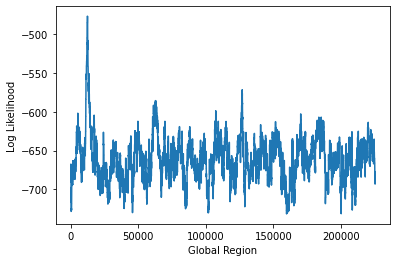

In [16]:
plt.plot(a)
plt.ylabel('Log Likelihood')
plt.xlabel('Global Region')
plt.show()

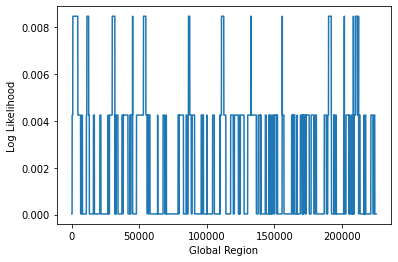

In [245]:
if True:
        #plt.figure(figsize=(20,8))
        plt.plot(a[5])
        plt.ylabel('Log Likelihood')
        plt.xlabel('Global Region')
        plt.show()

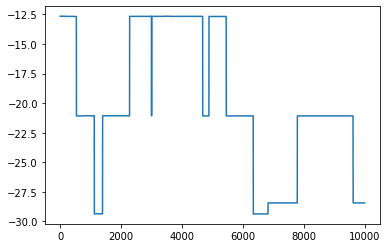

In [228]:
plt.plot(np.array(a)[[0,1,2,3,4,5,6],12000:22000].sum(axis=0))

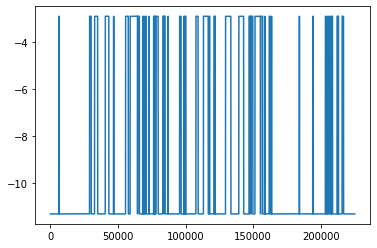

In [246]:
plt.plot(a[8])

In [274]:
Counter(a[0])

Counter({-11.312311316681368: 128603,
         -11.308091272507918: 47988,
         -2.9056363821312927: 35039,
         -2.901416337957841: 13683})